c:\Users\jashw\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


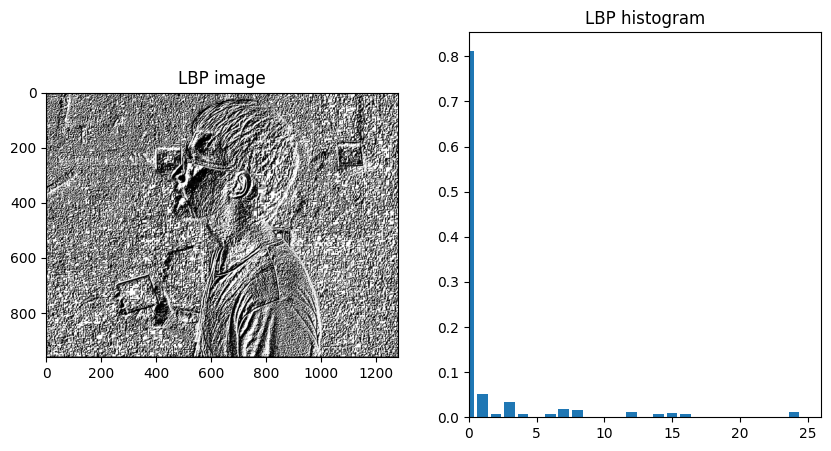

In [1]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load image
img = cv2.imread('5.jpeg')

# Convert image to grayscale
gray_img = rgb2gray(img)

# Compute LBP features
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray_img, n_points, radius)

# Normalize the histogram
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

# Display LBP image and histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(lbp, cmap='gray')
ax[0].set_title('LBP image')
ax[1].bar(np.arange(0, n_points + 2), hist, width=0.8)
ax[1].set_xlim([0, n_points + 2])
ax[1].set_title('LBP histogram')
plt.show()
